Total points for this HW: 10

Make sure that you run all your codes and that all results are printed.

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1 (40%)

In this question, you will model traffic counts in Pittsburgh using Gaussian process (GP) regression.  The included dataset, "PittsburghTrafficCounts.csv", represents the average daily traffic counts computed by traffic sensors at over 1,100 locations in Allegheny County, PA.  The data was collected from years 2012-2014 and compiled by Carnegie Mellon University’s Traffic21 Institute; we have the longitude, latitude, and average daily count for each sensor.  

Given this dataset, your goal is to learn a model of traffic count as a function of spatial location.  To do so, fit a Gaussian Process regression model to the observed data.  While you can decide on the precise kernel specification, you should try to achieve a good model fit, as quantified by a log marginal likelihood value greater than (i.e., less negative than) -1400.  Here are some hints for getting a good model fit:

* We recommend that you take the logarithm of the traffic counts, and then subtract the mean of this vector, before fitting the model.

* Since the data is noisy, don't forget to include a noise term (WhiteKernel) in your model.

* When fitting a GP with RBF kernel on multidimensional data, you can learn a separate length scale for each dimension, e.g., length_scale=(length_scale_x, length_scale_y). 

Your Python code should provide the following five outputs:

1) The kernel after parameter optimization and fitting to the observed data. (10%)

2) The log marginal likelihood of the training data. (5%)

3) Show a 2-D plot of the model's predictions over a mesh grid of longitude/latitude (with color corresponding to the model's predictions) and overlay a 2-D scatter plot of sensor locations (with color corresponding to the observed values). (10%)

4) What percentage of sensors have average traffic counts more than two standard deviations higher or lower than the model predicts given their spatial location? (5%)

5) Show a 2-D scatter plot of the sensor locations, with three colors corresponding to observed values a) more than two standard deviations higher than predicted, b) more then two standard deviations lower than predicted, and c) within two standard deviations of the predicted values. (10%)


In [1]:
import pandas as pd
import numpy as np
Data1=pd.read_csv("PittsburghTrafficCounts.csv")
Data1.head()

,Longitude,Latitude,AvgDailyTrafficCount
0,-80.278366,40.468606,84.0
1,-80.162117,40.384598,95.0
2,-80.221205,40.366778,97.0
3,-80.142455,40.622084,111.0
4,-80.131975,40.544915,125.0


In [2]:
# your code here
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel
import matplotlib.pyplot as plt

In [3]:
Data1['LOG'] = np.log(Data1['AvgDailyTrafficCount'])
Data1['LOG+'] = Data1['LOG']-Data1['LOG'].mean()

In [4]:
Data1

,Longitude,Latitude,AvgDailyTrafficCount,LOG,LOG+
0,-80.278366,40.468606,84.0,4.430817,-3.977559
1,-80.162117,40.384598,95.0,4.553877,-3.854499
2,-80.221205,40.366778,97.0,4.574711,-3.833665
3,-80.142455,40.622084,111.0,4.709530,-3.698846
4,-80.131975,40.544915,125.0,4.828314,-3.580062
...,...,...,...,...,...
1110,-79.843684,40.498619,13428.0,9.505097,1.096721
1111,-79.926842,40.425383,13713.0,9.526100,1.117724
1112,-80.065730,40.397582,13822.0,9.534017,1.125641
1113,-79.863848,40.429878,14172.0,9.559023,1.150648


In [5]:
X = Data1.iloc[:,:2].values
Y = Data1.loc[:,'LOG+'].values

In [6]:
kernel = 1.* RBF(length_scale=1., length_scale_bounds=(1e-1, 1e1)) \
    + WhiteKernel(noise_level=1., noise_level_bounds=(1e-10, 1e10))

gp = GaussianProcessRegressor(kernel=kernel,random_state=1)

In [7]:
gp.fit(X, Y)

C:\Users\14367\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         random_state=1)

In [8]:
#1) The kernel after parameter optimization and fitting to the observed data. (10%)
gp.kernel_

1.8**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.631)

In [9]:
#2) The log marginal likelihood of the training data. (5%)

In [10]:
gp.log_marginal_likelihood_value_

-1388.503214715074

In [11]:
#3) Show a 2-D plot of the model's predictions over a mesh grid of longitude/latitude (with color corresponding to the model's predictions) and overlay a 2-D scatter plot of sensor locations (with color corresponding to the observed values). (10%)

In [12]:
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

In [13]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [14]:
Z, sigma = gp.predict(np.c_[xx.ravel(), yy.ravel()], return_std = True)
Z = Z.reshape(xx.shape)

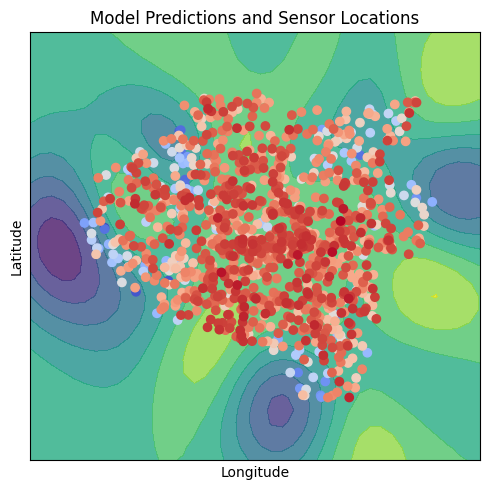

In [15]:
plt.figure(figsize=(5, 5))

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1],cmap='coolwarm', c=Y)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Model Predictions and Sensor Locations')

plt.tight_layout()
plt.show()

In [16]:
#4) What percentage of sensors have average traffic counts more than two standard deviations higher or lower than the model predicts given their spatial location? (5%)

In [17]:
mean_Z = np.mean(Z)
std_Z = np.std(Z)

In [18]:
std_Z

0.8520366448371428

In [19]:
h = np.where(Y > mean_Z + (2*std_Z))[0]
l = np.where(Y < mean_Z - (2*std_Z))[0]

In [20]:
percentage_higher = len(h) / len(Y) * 100
percentage_lower = len(l) / len(Y) * 100

In [21]:
print(f"Percentage of sensors with counts more than two standard deviations higher: {percentage_higher:.2f}%")
print(f"Percentage of sensors with counts more than two standard deviations lower: {percentage_lower:.2f}%")

Percentage of sensors with counts more than two standard deviations higher: 0.00%
Percentage of sensors with counts more than two standard deviations lower: 5.20%


In [22]:
#5) Show a 2-D scatter plot of the sensor locations, with three colors corresponding to observed values a) more than two standard deviations higher than predicted, b) more then two standard deviations lower than predicted, and c) within two standard deviations of the predicted values. (10%)

In [23]:
m = np.where((Y >= mean_Z - (2*std_Z))&(Y <= mean_Z + (2*std_Z)))[0]

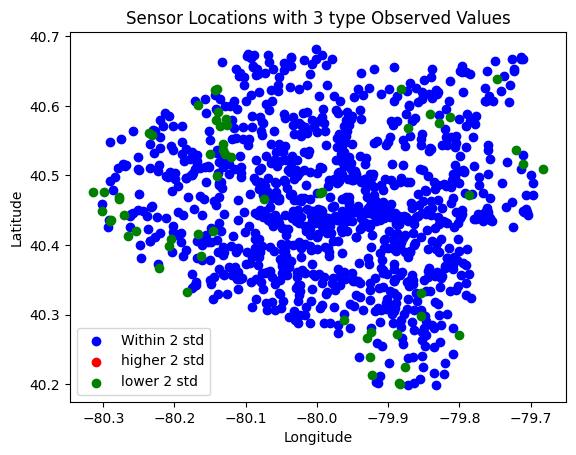

In [24]:
plt.scatter(X[m, 0], X[m, 1], c='blue', label='Within 2 std')
plt.scatter(X[h, 0], X[h, 1], c='red', label='higher 2 std')
plt.scatter(X[l, 0], X[l, 1], c='green', label='lower 2 std')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sensor Locations with 3 type Observed Values')
plt.legend()
plt.show()

### Question 2: Cluster-based anomaly detection (10%)

Given an unlabeled dataset with two real-valued attributes, we perform cluster-based anomaly detection by running k-means, choosing the number of clusters k automatically using the Schwarz criterion.  Four clusters are formed:

A: 100 points, center (0, 0), standard deviation 1

B: 150 points, center (35, 5), standard deviation 5

C: 200 points, center (15, 20), standard deviation 0.1

D: 2 points, center (10, 10), standard deviation 1

Given the four points below, which of these points are, and are not, likely to be anomalies?  Choose “Anomaly” or “Not Anomaly”, and provide a brief explanation, for each point. 
(Hint: your answers should take into account the size and standard deviation of each cluster as well as the distances to cluster centers.)

(1, 0)		 Not Anomaly. The distance between the center of cluster A (0,0) and the point (1,0) is 1, it is equal to the std of A and so that the d is not very far. And the points number of A is 100, the cluster is pretty big so that there is a higher possibility that the point (1,0) is not an anomaly point.


(35, 2)		 Not Anomaly. The distance between the center of cluster B (35,5) and the point (35,2) is 3, it is less than the std of B and so that the d ratio is 0.6 and less than 1. And the points number of B is 150, the cluster is pretty big so that there is a higher possibility that the point (35,2) is not an anomaly point.


(15, 19)	Anomaly. The distance between the center of cluster C (15,20) and the point (15,19) is 1, it is 10 times the std of B 0.1 and so that the d ratio is 10 and far more than 1. Altough the points number of cluster C is 200 and the cluster is very big, the impact of distance is far greater than the impact of cluster size, so there is a higher possibility that the point (15,19) is an anomaly point.


(10, 11)   Anomaly. The distance between the center of cluster D (10,10) and the point (10,11) is 1, it is equal to the std of D and so that the d is not very far, d ratio is 1. And the points number of D is only 2, the cluster is very small so that the impact of the cluster size is far greater than the impact of the distance, so there is a higher possibility that the point (10,11) is an anomaly value.


In [25]:
# Your solutions here
print('For (1, 0):  Not Anomaly. The distance between the center of cluster A (0,0) and the point (1,0) is 1, it is equal to the std of A and so that the d is not very far. And the points number of A is 100, the cluster is pretty big so that there is a higher possibility that the point (1,0) is not an anomaly point.')
print('\nFor (35,2):  Not Anomaly. The distance between the center of cluster B (35,5) and the point (35,2) is 3, it is less than the std of B and so that the d ratio is 0.6 and less than 1. And the points number of B is 150, the cluster is pretty big so that there is a higher possibility that the point (35,2) is not an anomaly point.')
print('\nFor (15,19):  Anomaly. The distance between the center of cluster C (15,20) and the point (15,19) is 1, it is 10 times the std of B 0.1 and so that the d ratio is 10 and far more than 1. Altough the points number of cluster C is 200 and the cluster is very big, the impact of distance is far greater than the impact of cluster size, so there is a higher possibility that the point (15,19) is an anomaly point.')
print('\nFor (10,11):  Anomaly. The distance between the center of cluster D (10,10) and the point (10,11) is 1, it is equal to the std of D and so that the d is not very far, d ratio is 1. And the points number of D is only 2, the cluster is very small so that the impact of the cluster size is far greater than the impact of the distance, so there is a higher possibility that the point (10,11) is an anomaly value.')

For (1, 0):  Not Anomaly. The distance between the center of cluster A (0,0) and the point (1,0) is 1, it is equal to the std of A and so that the d is not very far. And the points number of A is 100, the cluster is pretty big so that there is a higher possibility that the point (1,0) is not an anomaly point.

For (35,2):  Not Anomaly. The distance between the center of cluster B (35,5) and the point (35,2) is 3, it is less than the std of B and so that the d ratio is 0.6 and less than 1. And the points number of B is 150, the cluster is pretty big so that there is a higher possibility that the point (35,2) is not an anomaly point.

For (15,19):  Anomaly. The distance between the center of cluster C (15,20) and the point (15,19) is 1, it is 10 times the std of B 0.1 and so that the d ratio is 10 and far more than 1. Altough the points number of cluster C is 200 and the cluster is very big, the impact of distance is far greater than the impact of cluster size, so there is a higher possi

### Question 3: Anomaly detection (50%)

For this question, use the "County Health Indicators" dataset provided to identify the most anomalous counties. Please list the top 5 most anomalous counties computed using each of the following models.  (We recommend that, as a pre-processing step, you drop na values, and make sure all numeric values are treated as floats not strings.)

Part 1: Learn a Bayesian network structure using only the six features ["'\% Smokers'","'\% Obese'","'Violent Crime Rate'","'80/20 Income Ratio'","'\% Children in Poverty'","'Average Daily PM2.5'"].  Use pd.cut() to discretize each feature into 5 categories: 0,1,2,3,4. 

(a) Use HillClimbSearch and BicScore to learn the Bayesian network structure (5%) 

(b) Which 5 counties have the lowest (most negative) log-likelihood values? Please show a ranked list of the top counties' names and log-likelihood values. (10%)

Part 2: Cluster based anomaly detection. Use all numeric features for this part, and do not discretize. 

(a) Clustering with k-means. Please use k=3 clusters. Compute each record's distance to the nearest cluster center and report the five counties which have the longest distances. (10%)

(b) Cluster with Gaussian Mixture. Please repeat (2)a but use log-likelihood for each record (rather than distance) as the measure of anomalousness. (10%)

Part 3: Choose one more anomaly detection model you prefer and report the top 5 most anomalous counties by the model you chose. (10%)

Part 4: Compare and contrast the results from the different models.  Were there some counties that were found to be anomalous in some models and not in others? Please provide some intuitions on why each county was found to be anomalous. (5%)

In [26]:
Data2=pd.read_csv("CountyHealthIndicators.csv")
Data2.head()

,County,'\% Reporting Fair/Poor Health','Physically Unhealthy Days Per Month','Mentally Unhealthy Days Per Month','\% Low birth weight births','\% Smokers','\% Obese','Food Environment Index','\% Physically Inactive','\% With Access To Exercise',...,'\% Children in Poverty','80/20 Income Ratio','\% Single-Parent Households','Association Rate','Violent Crime Rate','Injury Death Rate','Average Daily PM2.5','\% Severe Housing Problems','\% Drive Alone','\% Long Commute - Drives Alone'
0,"Autauga, Alabama",19,4.4,4.3,9,19,31,7.1,29,71,...,18,4.3,27,13.8,254,76,12.9,14,89,42
1,"Baldwin, Alabama",16,4.1,4.2,9,19,27,7.6,25,72,...,20,4.5,28,12.0,221,70,13.1,15,84,37
2,"Barbour, Alabama",26,4.9,4.7,12,21,41,5.1,33,45,...,38,5.3,54,8.1,147,64,12.6,18,84,35
3,"Bibb, Alabama",22,4.8,4.6,12,21,40,7.4,33,33,...,27,4.3,32,9.8,236,75,12.9,13,84,46
4,"Blount, Alabama",21,4.6,4.5,7,19,32,8.3,29,26,...,24,4.1,28,8.5,219,89,12.7,12,85,59


In [27]:
# your code here
numeric_columns = Data2.iloc[:,1:].columns
for column in numeric_columns:
    Data2[column] = pd.to_numeric(Data2[column], errors='coerce')
numeric_columns2 = Data2.select_dtypes(include=['int', 'float']).columns
Data2[numeric_columns2] = Data2[numeric_columns2].astype(float)

In [36]:
Data2 = Data2.dropna(how='any',axis=0)

In [65]:
Data2

,County,'\% Reporting Fair/Poor Health','Physically Unhealthy Days Per Month','Mentally Unhealthy Days Per Month','\% Low birth weight births','\% Smokers','\% Obese','Food Environment Index','\% Physically Inactive','\% With Access To Exercise',...,'\% Children in Poverty','80/20 Income Ratio','\% Single-Parent Households','Association Rate','Violent Crime Rate','Injury Death Rate','Average Daily PM2.5','\% Severe Housing Problems','\% Drive Alone','\% Long Commute - Drives Alone'
0,"Autauga, Alabama",19.0,4.4,4.3,9.0,19.0,31.0,7.1,29.0,71.0,...,18.0,4.3,27.0,13.8,254.0,76.0,12.9,14.0,89.0,42.0
1,"Baldwin, Alabama",16.0,4.1,4.2,9.0,19.0,27.0,7.6,25.0,72.0,...,20.0,4.5,28.0,12.0,221.0,70.0,13.1,15.0,84.0,37.0
2,"Barbour, Alabama",26.0,4.9,4.7,12.0,21.0,41.0,5.1,33.0,45.0,...,38.0,5.3,54.0,8.1,147.0,64.0,12.6,18.0,84.0,35.0
3,"Bibb, Alabama",22.0,4.8,4.6,12.0,21.0,40.0,7.4,33.0,33.0,...,27.0,4.3,32.0,9.8,236.0,75.0,12.9,13.0,84.0,46.0
4,"Blount, Alabama",21.0,4.6,4.5,7.0,19.0,32.0,8.3,29.0,26.0,...,24.0,4.1,28.0,8.5,219.0,89.0,12.7,12.0,85.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,"Sweetwater, Wyoming",14.0,3.4,3.2,9.0,19.0,29.0,8.2,26.0,91.0,...,12.0,4.0,26.0,9.5,429.0,91.0,11.9,10.0,77.0,18.0
3137,"Teton, Wyoming",11.0,3.0,3.0,6.0,15.0,13.0,7.9,11.0,98.0,...,10.0,3.8,19.0,19.3,299.0,47.0,10.2,20.0,63.0,11.0
3138,"Uinta, Wyoming",15.0,3.4,3.2,9.0,18.0,30.0,7.6,25.0,15.0,...,13.0,4.7,24.0,6.6,45.0,91.0,11.6,12.0,78.0,17.0
3139,"Washakie, Wyoming",14.0,3.3,3.3,6.0,16.0,25.0,8.2,22.0,61.0,...,16.0,4.5,29.0,22.5,70.0,83.0,10.0,9.0,70.0,12.0


#### Part1

In [37]:
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianModel
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

In [38]:
features = ["'\% Smokers'","'\% Obese'","'Violent Crime Rate'","'80/20 Income Ratio'","'\% Children in Poverty'","'Average Daily PM2.5'"]
df1 = Data2.loc[:,['County']+features]
df1 = df1.set_index('County',drop=True)
for f in features:
    df1[f] = pd.cut(df1[f], bins=5, labels=[0, 1, 2, 3, 4], include_lowest=True)

In [39]:
hc = HillClimbSearch(df1)
best_model = hc.estimate(scoring_method='BicScore')
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[("'\\% Smokers'", "'\\% Children in Poverty'"), ("'\\% Smokers'", "'Average Daily PM2.5'"), ("'\\% Obese'", "'\\% Smokers'"), ("'\\% Children in Poverty'", "'80/20 Income Ratio'"), ("'\\% Children in Poverty'", "'Violent Crime Rate'")]


In [40]:
model = BayesianNetwork(best_model.edges())
model.fit(df1, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of '\% Smokers':
+-----------------+---------------------+-----+-----------------------+---------------------+
| '\% Obese'      | '\% Obese'(0)       | ... | '\% Obese'(3)         | '\% Obese'(4)       |
+-----------------+---------------------+-----+-----------------------+---------------------+
| '\% Smokers'(0) | 0.45454545454545453 | ... | 0.0034129692832764505 | 0.0                 |
+-----------------+---------------------+-----+-----------------------+---------------------+
| '\% Smokers'(1) | 0.5454545454545454  | ... | 0.47667804323094426   | 0.0967741935483871  |
+-----------------+---------------------+-----+-----------------------+---------------------+
| '\% Smokers'(2) | 0.0                 | ... | 0.5005688282138794    | 0.7580645161290323  |
+-----------------+---------------------+-----+-----------------------+---------------------+
| '\% Smokers'(3) | 0.0                 | ... | 0.019340159271899887  | 0.11290322580645161 |
+-----------------+--------------------

In [41]:
def LL(x,model,verbose=False):
    loglike = 0
    for cpd in model.get_cpds():
        temp_cpd = cpd.copy()
        thevariable = temp_cpd.variable
        theparents = model.predecessors(thevariable)
        theparents_list = []
        for parent in theparents:
            temp_cpd.reduce([(parent, x[parent])])
            theparents_list.append(parent)
        theprob = temp_cpd.get_values()[x[thevariable],0]
        if verbose:
            print(thevariable,theparents_list,theprob)
        loglike += np.log(theprob)
    return loglike

In [42]:
exmp=df1.apply(lambda x: LL(x,model),axis=1)

In [43]:
print(exmp.sort_values().head(5))

County
New York, New York                           -16.608495
San Francisco, California                    -14.827149
Roulette, North Dakota                       -14.686742
Suffolk, Massachusetts                       -14.457849
District of Columbia, District of Columbia   -13.671439
dtype: float64


#### Part 2

In [52]:
from sklearn.cluster import KMeans
X=Data2.iloc[:,1:].values

In [45]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3,random_state=999)
scor=KM.fit_predict(X)

In [46]:
res=pd.DataFrame(KM.transform(X))
res.head()

,0,1,2
0,555.680750,215.029850,102.542110
1,656.912395,107.787858,187.649134
2,532.058723,410.257384,281.390995
3,603.414431,167.697667,142.469115
4,778.176116,104.884130,316.517318


In [47]:
res=pd.DataFrame(KM.transform(X))
res=pd.concat((res,pd.DataFrame(KM.fit_predict(X))),axis=1)
res.columns=list(range(3))+["cluster"]
res.loc[:,"score"]=res.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
res.sort_values("score",ascending=False)[:5]

,0,1,2,cluster,score
1890,1970.505640,2443.498401,2249.734112,0,1970.505640
1294,1331.341087,2035.478821,1758.259173,0,1331.341087
96,1207.512661,1917.066691,1638.047997,0,1207.512661
2304,1018.028250,1644.469170,1393.029904,0,1018.028250
995,917.063749,1651.302462,1365.597381,0,917.063749


In [48]:
print(res['cluster'].value_counts())

1    1429
2     812
0     245
Name: cluster, dtype: int64


In [56]:
Data2.iloc[np.r_[1890,1294,96,2304,995],:]

,County,'\% Reporting Fair/Poor Health','Physically Unhealthy Days Per Month','Mentally Unhealthy Days Per Month','\% Low birth weight births','\% Smokers','\% Obese','Food Environment Index','\% Physically Inactive','\% With Access To Exercise',...,'\% Children in Poverty','80/20 Income Ratio','\% Single-Parent Households','Association Rate','Violent Crime Rate','Injury Death Rate','Average Daily PM2.5','\% Severe Housing Problems','\% Drive Alone','\% Long Commute - Drives Alone'
2415,"Shannon, South Dakota",33.0,5.9,4.7,7.0,41.0,45.0,1.6,24.0,2.0,...,54.0,6.5,68.0,2.8,0.0,200.0,11.8,44.0,64.0,22.0
1595,"St. Louis City, Missouri",23.0,5.0,4.4,12.0,26.0,32.0,5.0,25.0,99.0,...,43.0,6.2,61.0,14.1,1885.0,98.0,11.9,23.0,71.0,25.0
126,"Crittenden, Arkansas",26.0,5.2,4.6,13.0,26.0,38.0,4.8,34.0,63.0,...,41.0,5.1,58.0,8.2,1764.0,65.0,12.7,20.0,83.0,31.0
2939,"Petersburg City, Virginia",26.0,4.5,4.0,13.0,23.0,38.0,4.4,28.0,93.0,...,38.0,4.9,68.0,16.6,560.0,81.0,12.3,18.0,79.0,23.0
1214,"Baltimore City, Maryland",20.0,3.8,3.9,12.0,21.0,34.0,6.0,29.0,99.0,...,32.0,6.2,66.0,9.7,1449.0,99.0,12.6,24.0,60.0,39.0


In [49]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=3,random_state=999)
GM.fit(X)

GaussianMixture(n_components=3, random_state=999)

In [50]:
pd.DataFrame(GM.score_samples(X)).sort_values(0)[:5]

,0
1890,-197.556002
66,-133.131563
1444,-131.489657
2158,-129.240575
1577,-126.757461


In [51]:
print(pd.Series(GM.predict(X)).value_counts())

1    1198
0     650
2     638
dtype: int64


In [58]:
Data2.iloc[np.r_[1890,66,1444,2158,1577],:]

,County,'\% Reporting Fair/Poor Health','Physically Unhealthy Days Per Month','Mentally Unhealthy Days Per Month','\% Low birth weight births','\% Smokers','\% Obese','Food Environment Index','\% Physically Inactive','\% With Access To Exercise',...,'\% Children in Poverty','80/20 Income Ratio','\% Single-Parent Households','Association Rate','Violent Crime Rate','Injury Death Rate','Average Daily PM2.5','\% Severe Housing Problems','\% Drive Alone','\% Long Commute - Drives Alone'
2415,"Shannon, South Dakota",33.0,5.9,4.7,7.0,41.0,45.0,1.6,24.0,2.0,...,54.0,6.5,68.0,2.8,0.0,200.0,11.8,44.0,64.0,22.0
94,"Apache, Arizona",30.0,5.7,5.3,7.0,26.0,33.0,0.5,22.0,22.0,...,40.0,6.3,52.0,3.5,94.0,173.0,9.8,36.0,75.0,42.0
1856,"New York, New York",14.0,3.5,3.5,9.0,13.0,15.0,7.8,18.0,98.0,...,24.0,8.7,41.0,13.0,620.0,32.0,10.8,25.0,6.0,63.0
2765,"Willacy, Texas",37.0,5.2,3.6,9.0,20.0,29.0,7.3,27.0,0.0,...,46.0,6.8,43.0,5.9,902.0,47.0,8.7,18.0,90.0,27.0
2027,"Roulette, North Dakota",29.0,5.1,4.5,10.0,38.0,41.0,6.9,34.0,21.0,...,41.0,7.7,59.0,6.2,29.0,104.0,9.6,21.0,84.0,14.0


#### Part 3

In [60]:
# Choose LOF
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=100,novelty=True,contamination='auto')
clf.fit(X)

LocalOutlierFactor(n_neighbors=100, novelty=True)

In [64]:
anomaly_scores = clf.decision_function(X)

anomalies_indices = anomaly_scores.argsort()[-5:][::-1]
top_anomalies = Data2.iloc[anomalies_indices]


top_anomalies

,County,'\% Reporting Fair/Poor Health','Physically Unhealthy Days Per Month','Mentally Unhealthy Days Per Month','\% Low birth weight births','\% Smokers','\% Obese','Food Environment Index','\% Physically Inactive','\% With Access To Exercise',...,'\% Children in Poverty','80/20 Income Ratio','\% Single-Parent Households','Association Rate','Violent Crime Rate','Injury Death Rate','Average Daily PM2.5','\% Severe Housing Problems','\% Drive Alone','\% Long Commute - Drives Alone'
2125,"Wayne, Ohio",15.0,3.6,3.9,6.0,19.0,27.0,7.6,26.0,67.0,...,20.0,3.9,23.0,14.5,91.0,57.0,13.8,13.0,80.0,25.0
697,"Bartholomew, Indiana",16.0,3.5,3.7,8.0,19.0,32.0,7.7,27.0,62.0,...,16.0,4.3,31.0,11.9,160.0,55.0,13.6,11.0,84.0,18.0
702,"Carroll, Indiana",15.0,3.4,3.7,7.0,20.0,29.0,8.2,33.0,62.0,...,16.0,3.8,21.0,14.9,87.0,66.0,13.5,10.0,81.0,46.0
651,"Macoupin, Illinois",13.0,3.4,3.5,8.0,15.0,33.0,7.9,31.0,61.0,...,20.0,4.1,28.0,18.1,170.0,70.0,12.1,10.0,82.0,43.0
1884,"Wayne, New York",12.0,3.3,3.5,7.0,15.0,29.0,8.3,26.0,65.0,...,18.0,3.9,33.0,11.4,155.0,54.0,12.3,12.0,85.0,37.0


#### Part 4

There are some counties found to be anomalous in some models and not in others. For example, the Shannon, South Dakota was found anomalous by K-Means method and Gaussian Mixture model, but we did not found it in the result of LOF.


I think there are three main reasons for the different results. First, different models may use different methods for judging anomalies, such as distance, likelihood, density, etc. Different indicators will lead to differences in the top five anomalies. 

Second, different parameters will also lead to different results, such as n neighbours in LOF, the number of clusters selected by K-means, etc. 

Third, the diversity of data viarables and factors will also make anomaly detection more sensitive, especially when the results only show the top five anomalies, the results are prone to change and differ.